# Visualization of learning effects - Weights

In [3]:
import pandas as pd
import keras
from keras import models
import my_functions
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

### 1. Choice of the models:

#### Available models:

In [4]:
pd.DataFrame(my_functions.results_preview()).head(15)

model_name  model_description  notebook  dataset_size  \
0    model_0_0-100-150-sgd-trd  32-64-128-256-512  Module_1          1600   
1   model_0_0-100-150-adlt-trd  32-64-128-256-512  Module_1          1600   
2   model_0_0-100-120-rmsp-trd  32-64-128-256-512  Module_1          1600   
3   model_0_0-100-100-RMSp-trd  32-64-128-256-512  Module_1          1600   
4    model_0_0-100-100-sgd-trd  32-64-128-256-512  Module_1          1600   
5     model_0_0-30-100-sgd-trd  32-64-128-256-512  Module_1          1600   
6      model_0_0-15-40-sgd-trd  32-64-128-256-512  Module_1          1600   
7     model_0_0-15-25-RMSp-trd  32-64-128-256-512  Module_1          1600   
8     model_0_0-15-15-rmsp-trd  32-64-128-256-512  Module_1          1600   
9    model_0_8-100-150-sgd-trd  32-64-128-256-512  Module_3          8000   
10   model_0_8-100-100-sgd-trd  32-64-128-256-512  Module_3          8000   
11    model_0_8-30-100-sgd-trd  32-64-128-256-512  Module_3          8000   
12     model_0_8-30-32-sgd-trd  32-64-128-256-512  Module_3          8000   
13    model_0_8-30-30-adlt-trd  32-64-128-256-512  Module_3          8000   
14     model_0_8-30-8-adlt-trd  32-64-128-256-512  Module_3          8000   

    batch_size  epochs         optimizer    acc      remarks  
0          100     150               sgd  0.924  100-overfit  
1          100     150          adadelta  0.918   20-overfit  
2          100     120           rmsprop  0.924   15-overfit  
3          100     100  RMSprop(lr=1e-4)  0.932   20-overfit  
4          100     100               sgd  0.904   no overfit  
5           30     100               sgd  0.918   40-overfit  
6           15      40               sgd  0.920   15-overfit  
7           15      25  RMSprop(lr=1e-4)  0.882    6-overfit  
8           15      15           rmsprop  0.926    4-overfit  
9          100     150               sgd  0.522   80-overfit  
10         100     100               sgd  0.934          ok.  
11          30     100               sgd  0.522   30-overfit  
12          30      32               sgd  0.918           ok  
13          30      30          adadelta  0.940    7-overfit  
14          30       8          adadelta  0.938           ok

In [5]:
model_0 = keras.models.load_model('./Models/model_0.h5')
model_0.summary()

Model: "model_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2951

### 2. Overview of the weights of the all convolutional layers before training:

All layers in this model:

Layer 0 : conv2d_1
Layer 1 : max_pooling2d_1
Layer 2 : conv2d_2
Layer 3 : max_pooling2d_2
Layer 4 : conv2d_3
Layer 5 : max_pooling2d_3
Layer 6 : conv2d_4
Layer 7 : max_pooling2d_4
Layer 8 : conv2d_5
Layer 9 : max_pooling2d_5
Layer 10 : flatten_1
Layer 11 : dense_1
Layer 12 : dense_2
________________________________________________________________________________

Layer 0 conv2d_1
Neurons: 32
Chanels per neuron: 27
Neurons' picture dimensions: (3, 9)


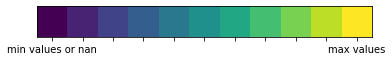

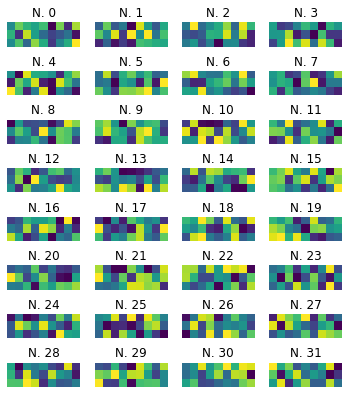

________________________________________________________________________________

Layer 2 conv2d_2
Neurons: 64
Chanels per neuron: 288
Neurons' picture dimensions: (16, 18)


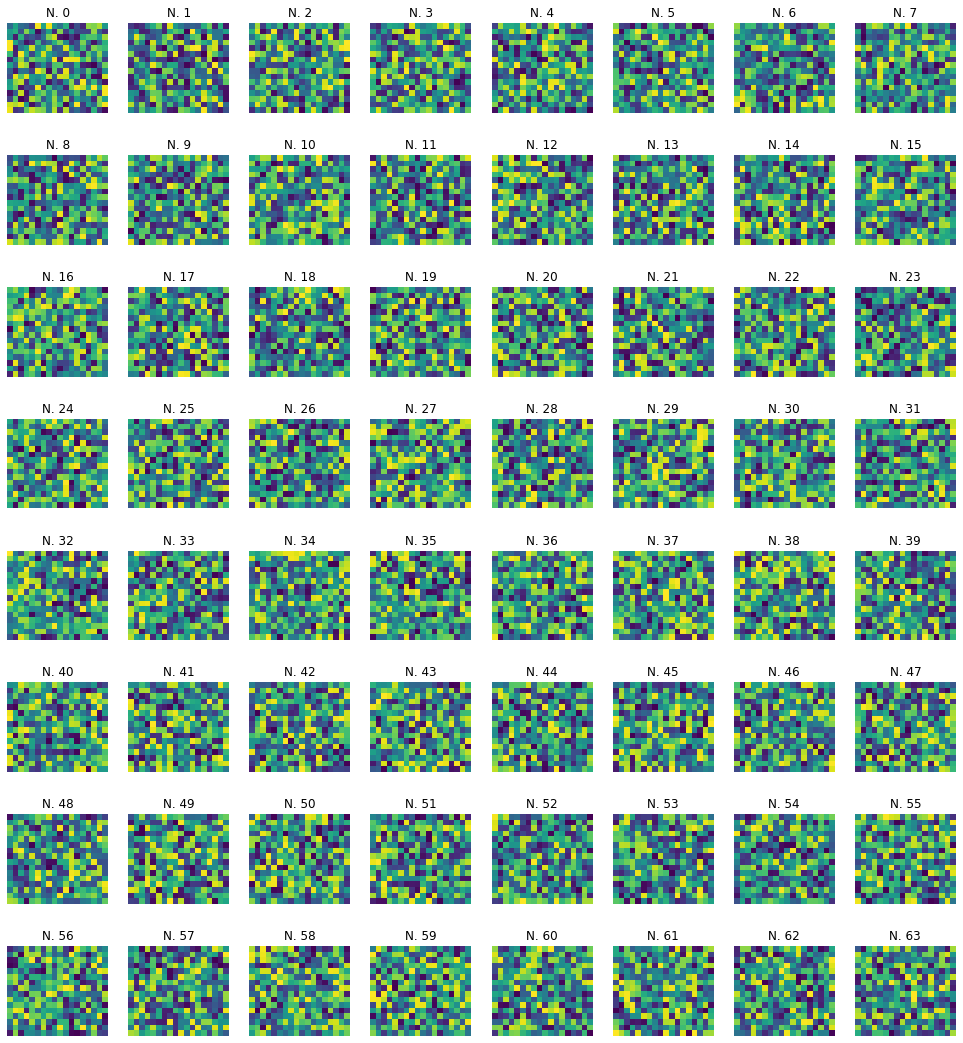

________________________________________________________________________________

Layer 4 conv2d_3
Neurons: 128
Chanels per neuron: 576
Neurons' picture dimensions: (16, 36)


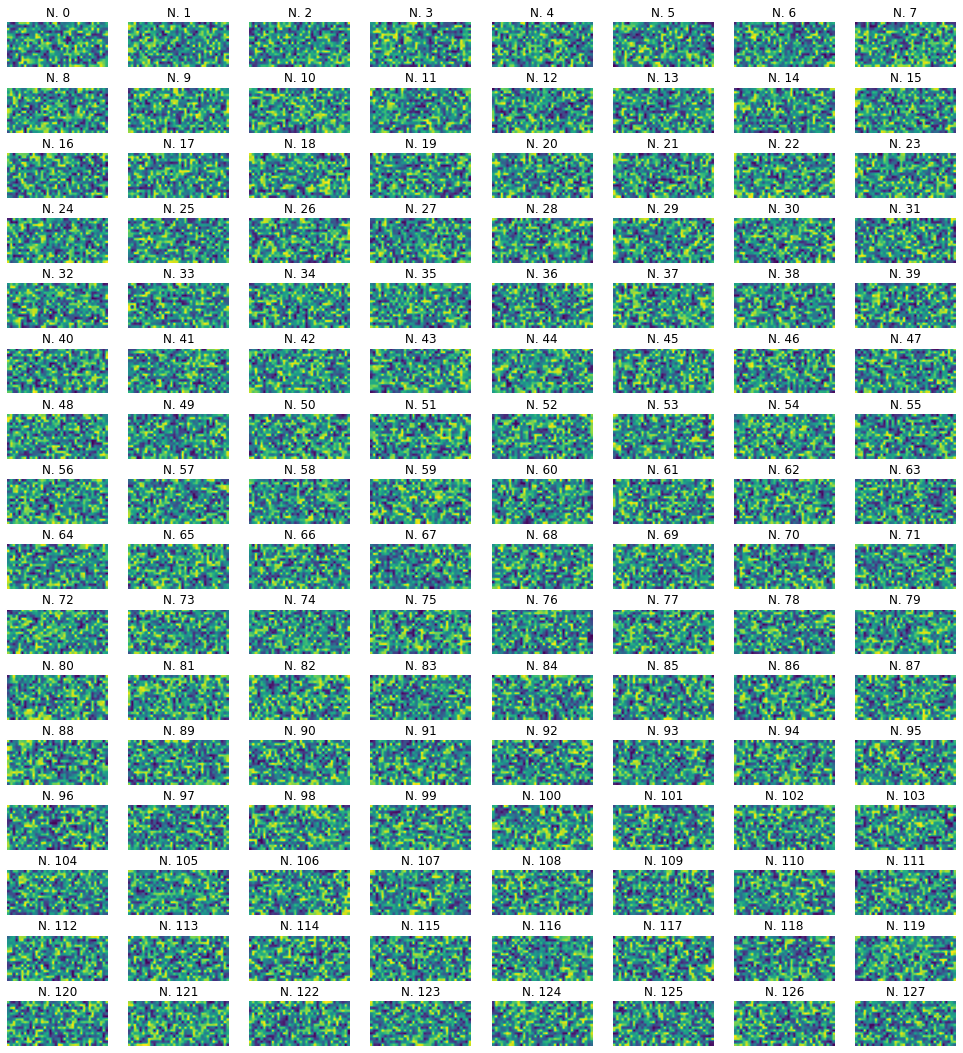

________________________________________________________________________________

Layer 6 conv2d_4
Neurons: 256
Chanels per neuron: 1152
Neurons' picture dimensions: (32, 36)


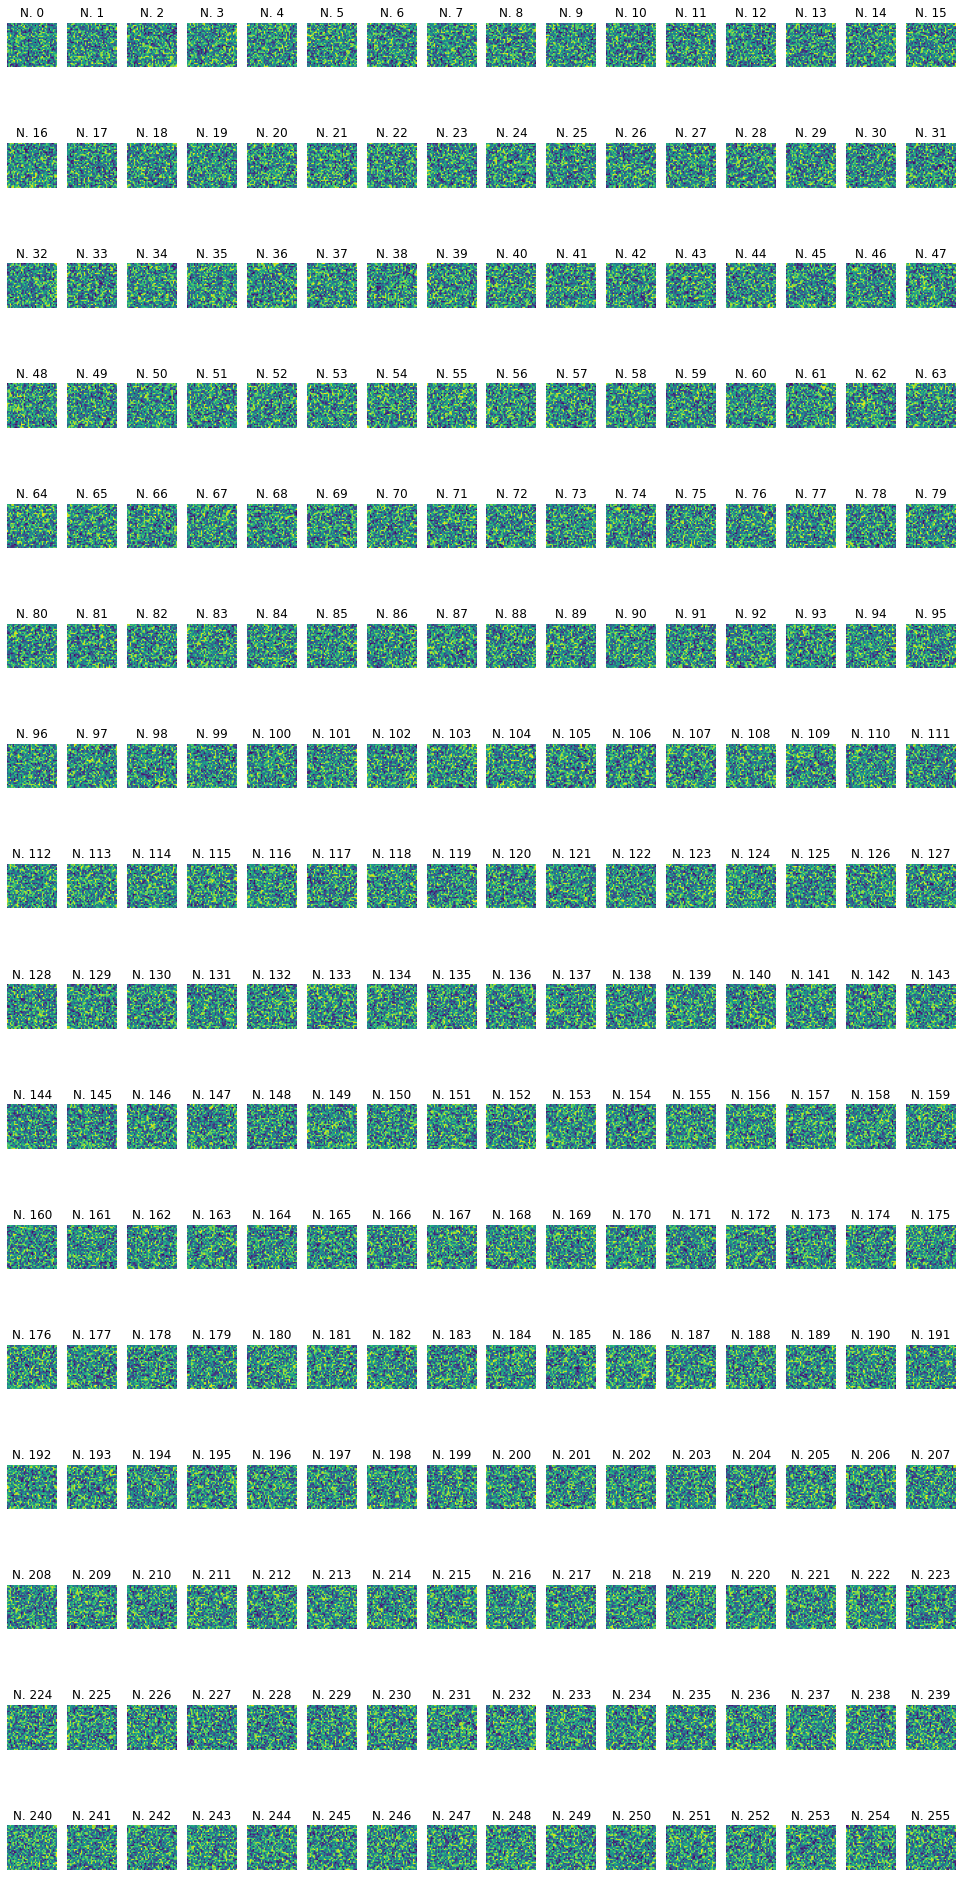

________________________________________________________________________________

Layer 8 conv2d_5
Neurons: 512
Chanels per neuron: 2304
Neurons' picture dimensions: (32, 72)


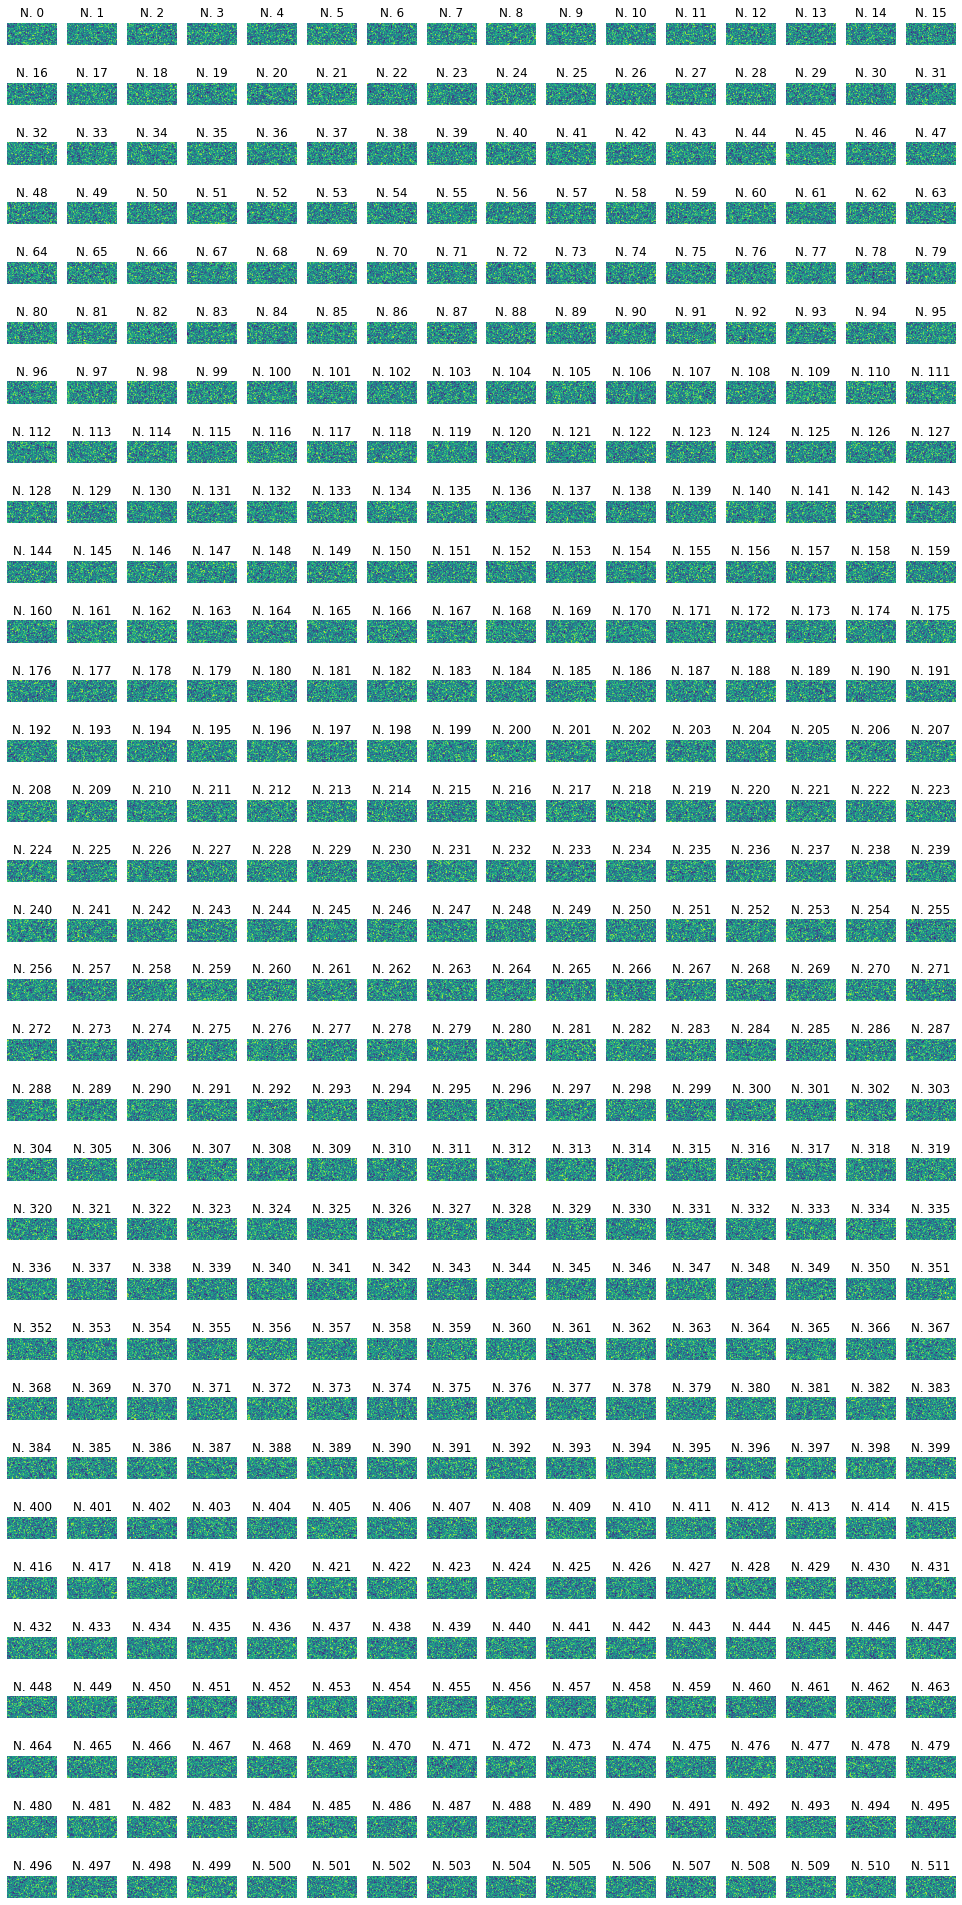

In [6]:
# available convolutional layers: [0,2,4,6,8]
# select one up to four from them to the layers list: 'selected_layers'
# e.g. selected_layers = [0,2,4,6] or [0,6,4] etc.
# --------------------------------------------------------------------
# available models: [model_0, model_trd]
# select one of them or both to the models list: selected_models = []
# selected_models = [model_0]
# selected_models = [model_trd]
# selected_models = [model_0, model_trd]
# selected_models = [model_trd, model_0]
# --------------------------------------------------------------------
# size_X: correction size X parameter for Layer 0 - don't change
# --------------------------------------------------------------------

selected_layers = [0,2,4,6,8]
selected_models = [model_0]

my_functions.weights_visualization(selected_layers, selected_models, size_X = 6, size_Y = 7)

### 3. Preview of the 6th layer's weights after training with model with low validation accuracy:

All layers in this model:

Layer 0 : conv2d_1
Layer 1 : max_pooling2d_1
Layer 2 : conv2d_2
Layer 3 : max_pooling2d_2
Layer 4 : conv2d_3
Layer 5 : max_pooling2d_3
Layer 6 : conv2d_4
Layer 7 : max_pooling2d_4
Layer 8 : conv2d_5
Layer 9 : max_pooling2d_5
Layer 10 : flatten_1
Layer 11 : dense_1
Layer 12 : dense_2
________________________________________________________________________________

Layer 6 conv2d_4
Neurons: 256
Chanels per neuron: 1152
Neurons' picture dimensions: (32, 36)


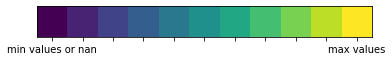

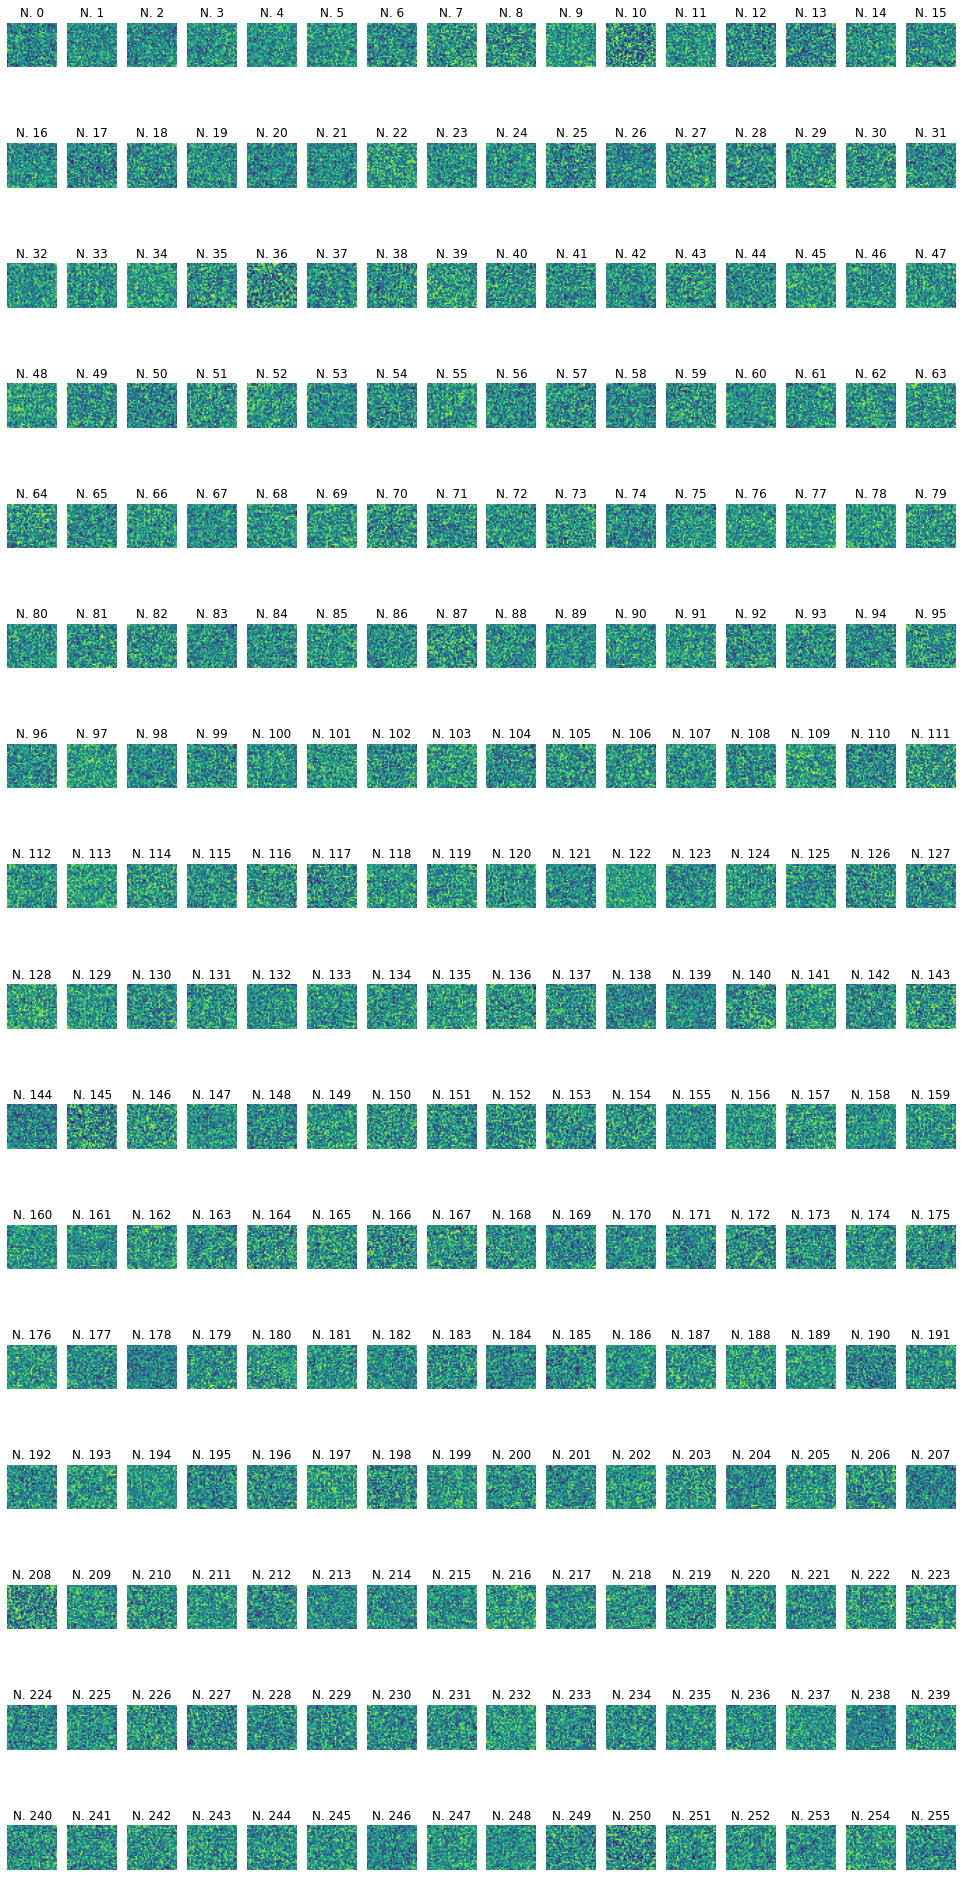

In [7]:
model_trd = keras.models.load_model('./Models/model_0_0-15-25-RMSp-trd.h5') # No.7

selected_layers = [6]
selected_models = [model_trd]

my_functions.weights_visualization(selected_layers, selected_models, size_X = 6, size_Y = 7)

### 4. Weights comparison between not trained and the weak trained model (7) for layer 6

Layer: 6  -  conv2d_4
Neuron: 112


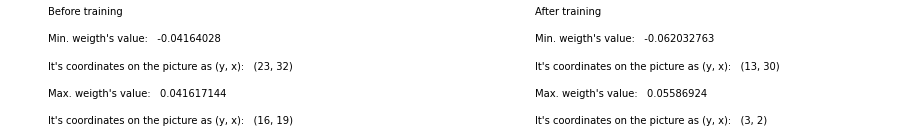

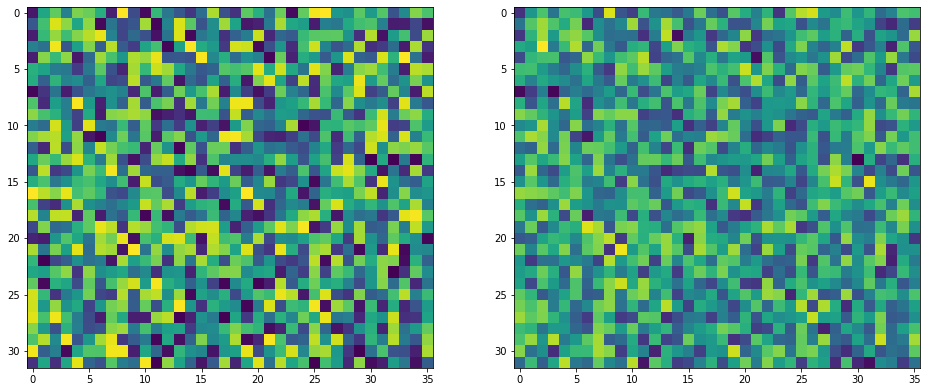

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 113


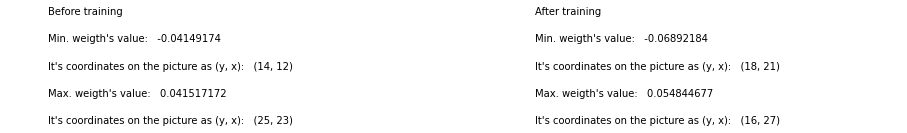

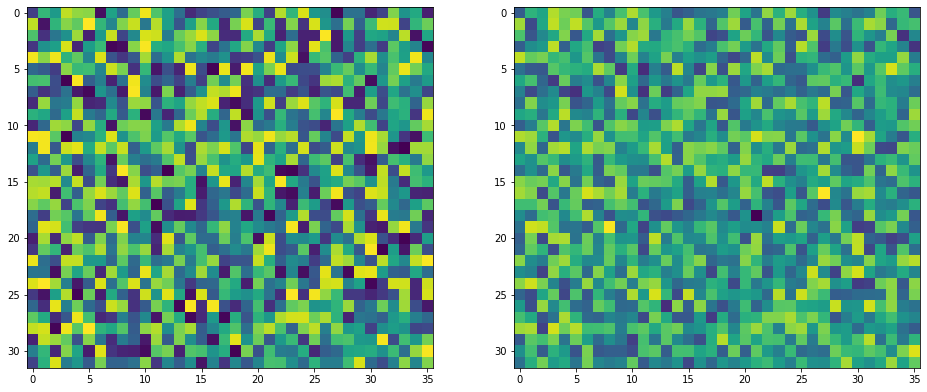

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 114


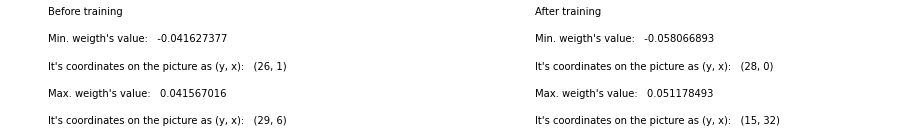

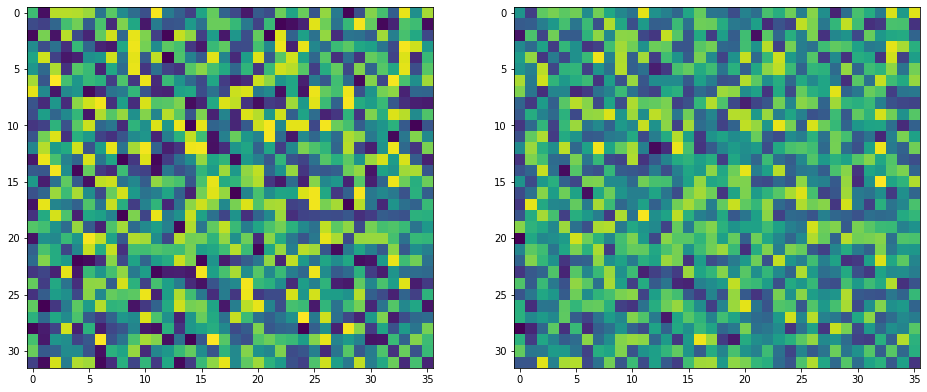

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 115


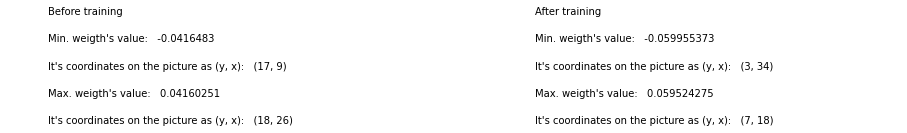

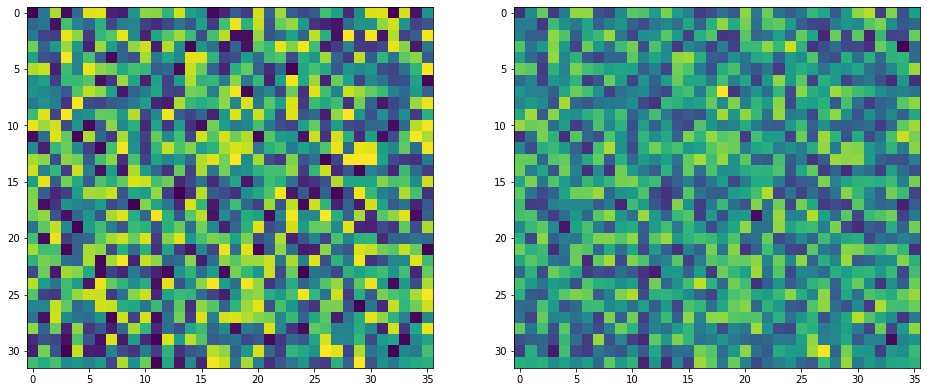

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 116


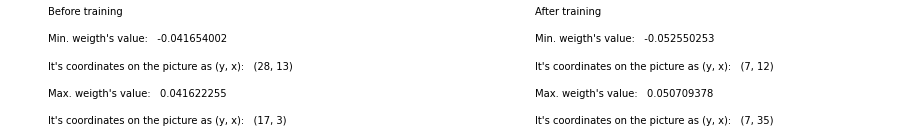

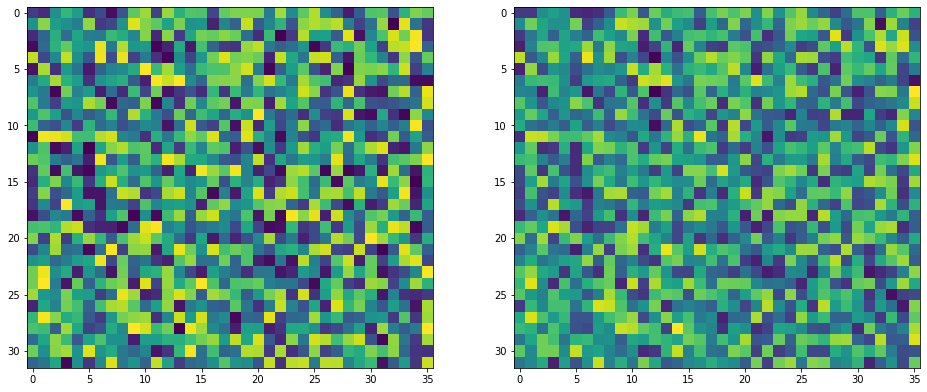

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 117


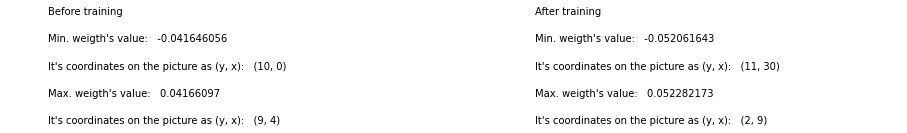

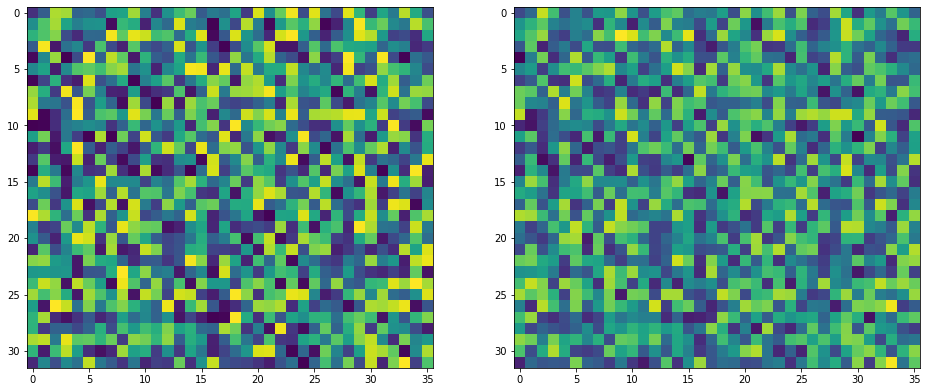

_________________________________________________________________________________________________________



In [8]:
selected_layer = 6
selected_models = [model_0, model_trd]
selected_neurons = [112, 113, 114, 115, 116, 117]

my_functions.weights_training_results(selected_layer, selected_models, selected_neurons)

### 5. Weights comparison between not trained and better trained model (14) - layer and neurons the same as previously

Layer: 6  -  conv2d_4
Neuron: 112


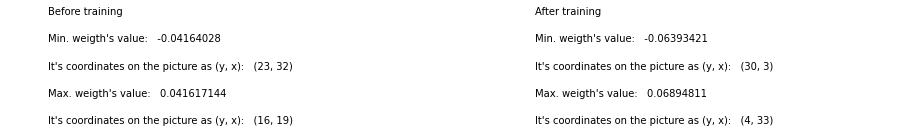

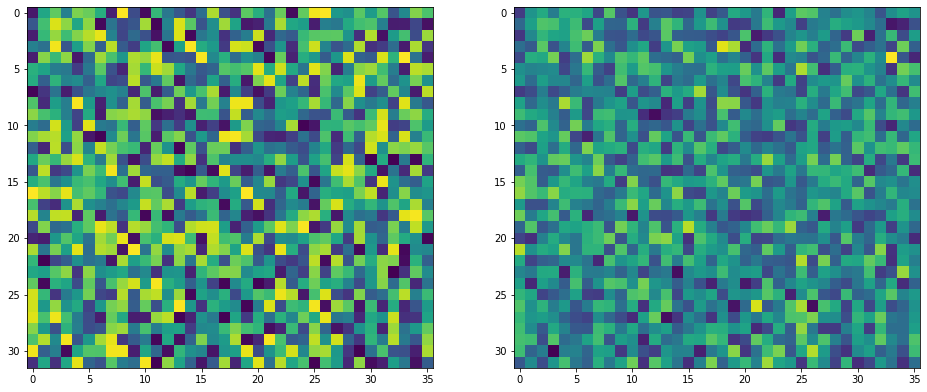

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 113


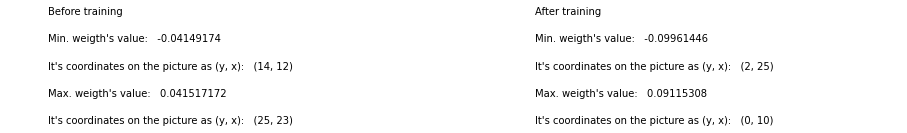

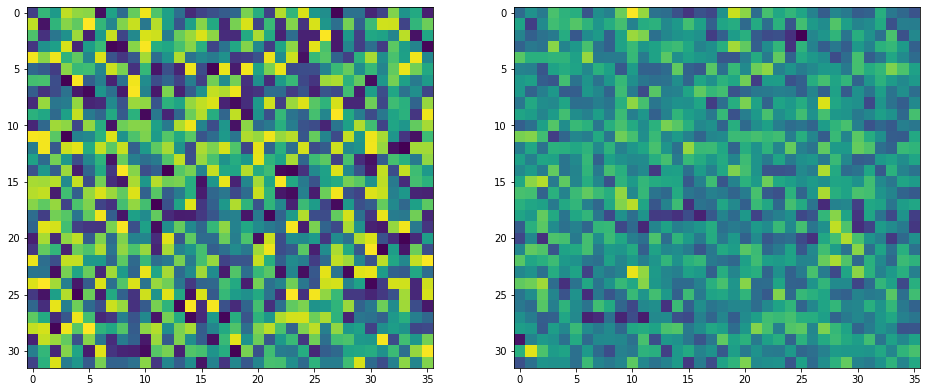

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 114


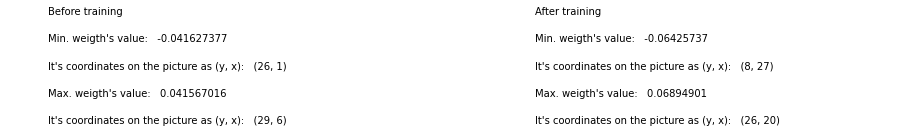

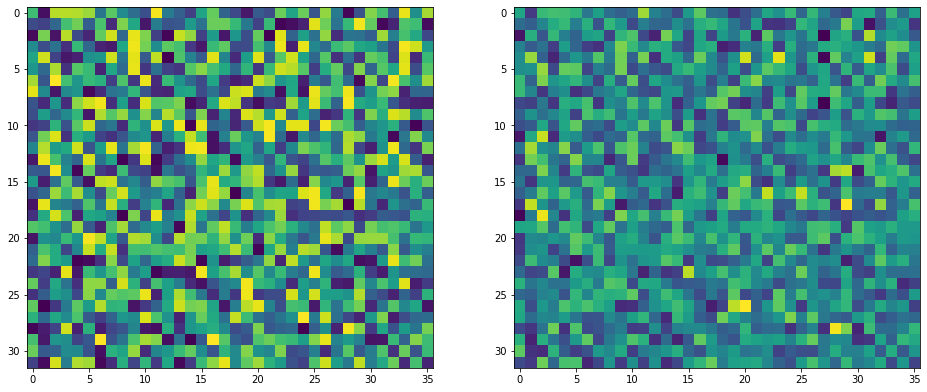

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 115


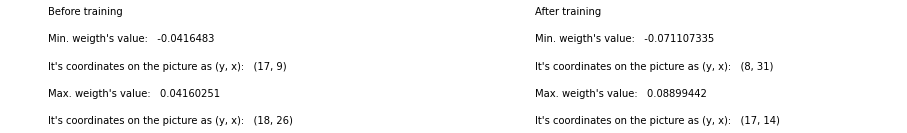

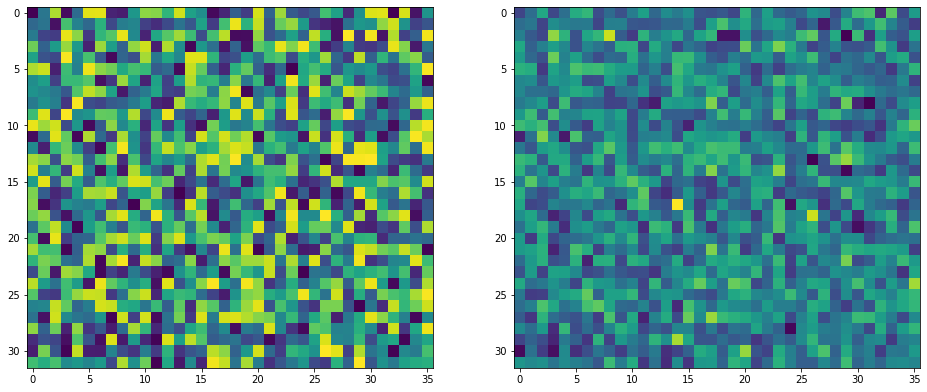

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 116


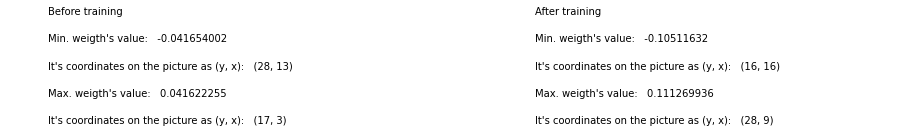

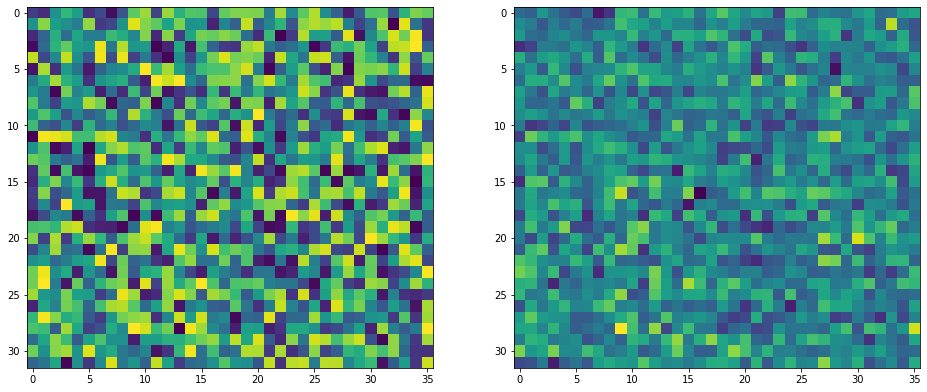

_________________________________________________________________________________________________________

Layer: 6  -  conv2d_4
Neuron: 117


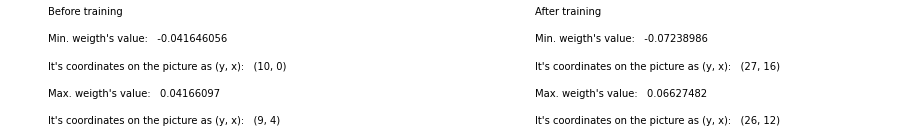

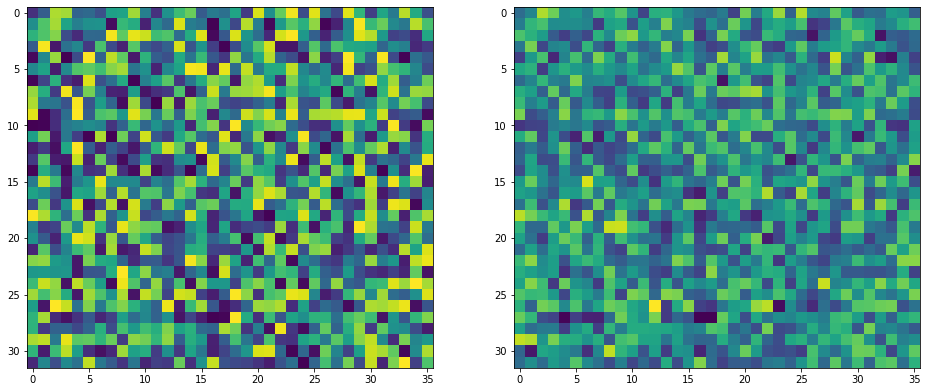

_________________________________________________________________________________________________________



In [9]:
model_trd = keras.models.load_model('./Models/model_0_8-30-8-adlt-trd.h5') # No.14

selected_models = [model_0, model_trd]

my_functions.weights_training_results(selected_layer, selected_models, selected_neurons)